# INFO 6205 – Program Structure and Algorithms Assignment 3 Solutions
## Name: Yanyan Chen
## NUID: 002799697
## Date: 10/22/2023
***Note: 1. some snippets of code are pseudo-code, for better explaining and answering questions, and don't really run. 2. All the tables and graphics are created by me and are all original!***

## **Q1:**
Provide brief definitions for the following:

i. Residual Graph

ii. Vertex Cover

iii. Ford-Fulkerson Algorithm

iv. Bipartite Matching

v. Floyd-Warshall Algorithm

###**Answer:**

i. Residual Graph

A graph which indicates additional allowable flow along paths. After computing a flow, the residual graph has capacities indicating how much additional flow could be sent along the paths.

ii. Vertex Cover

A set of vertices in a graph such that every edge has at least one of its endpoints in the set. It represents a way of 'covering' all the edges of the graph by a subset of vertices.

iii. Ford-Fulkerson Algorithm

An iterative algorithm that computes the maximum flow in a flow network. It relies on augmenting paths, found in the residual graph, and its termination can be guaranteed when using integer capacities.

iv. Bipartite Matching

A problem of finding the maximum cardinality matching in a bipartite graph. It can be solved using network flow techniques.

v. Floyd-Warshall Algorithm

An algorithm for finding the shortest paths between all pairs of vertices in a weighted graph. Like Bellman-Ford, it can handle graphs with negative-weight edges, but not negative-weight cycles.

## **Q2**:

Given the weighted directed graph below, use the Bellman-Ford algorithm to find the shortest path from node A to node E.

Graph Information:

1. $A -> B, weight: 6$
2. $A -> C, weight: 4$
3. $B -> E, weight: 2$
4. $C -> B, weight: -2$
5. $C -> D, weight: 3$
6. $D -> B, weight: 1$
7. $D -> E, weight: 5$

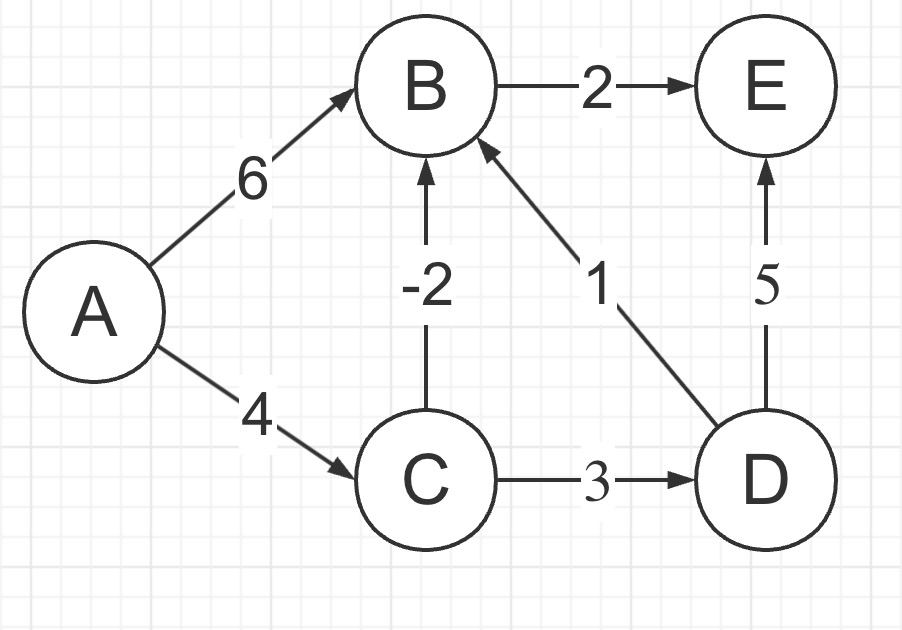

### **Answer:**

**Step 1: Initialization**

* Initialize the distance to the source node as 0 ($distance[A] = $0). Initialize the distances to all other nodes as positive infinity.

* Create a predecessor array to keep track of paths.

**Pseudo-Code:**

In [ ]:
# This is pseudo-code for better explaining solution process

for each node v in nodes:
    distance[v] = ∞
    predecessor[v] = undefined
distance[A] = 0

**Table after Initialization:**

 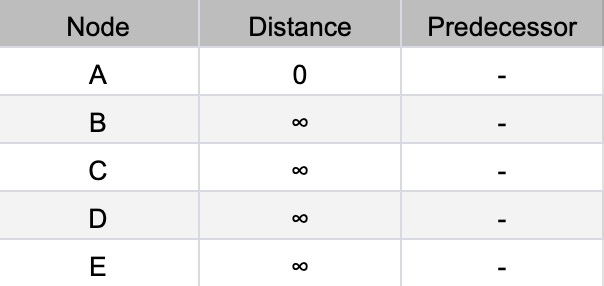

**Step 2: Relaxation**

For every node, apply relaxation for all the edges. We do this $|V| - 1$ times, where $|V|$ is the number of vertices in the graph.

**Pseudo-Code:**

In [ ]:
# This is pseudo-code for better explaining solution process

for i from 1 to size(nodes)-1:
    for each edge (u, v) with weight w in edges:
        if distance[u] + w < distance[v]:
            distance[v] = distance[u] + w
            predecessor[v] = u


**First Iteration:**

* $A -> B: 0 + 6 = 6 < ∞ => distance[B] = 6, predecessor[B] = A$
* $A -> C: 0 + 4 = 4 < ∞ => distance[C] = 4, predecessor[C] = A$

(Other edges don't update any distance values in this iteration.)

**Table after 1st Iteration:**

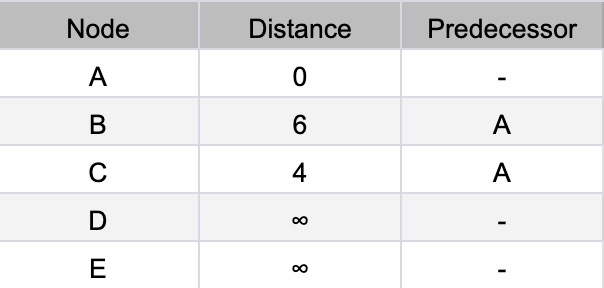

**Second Iteration:**

* $C -> B: 4 - 2 = 2 < 6 => distance[B] = 2, predecessor[B] = C$

* $C -> D: 4 + 3 = 7 < ∞ => distance[D] = 7, predecessor[D] = C$

* $D -> B: 7 + 1 = 8$ (not less than 2)

* $D -> E: 7 + 5 = 12 < ∞ => distance[E] = 12, predecessor[E] = D$

* $B -> E: 2 + 2 = 4 < 12 => distance[E] = 4, predecessor[E] = B$

**Table after 2nd Iteration:**

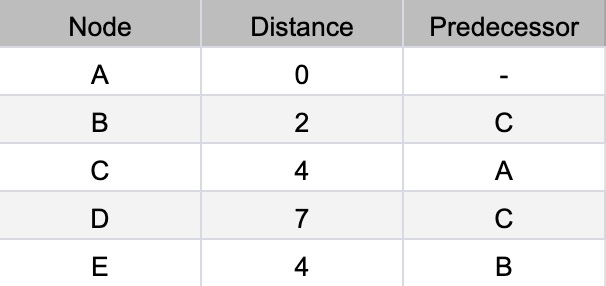

**Third and Fourth Iterations:**

No changes to the table occur in these iterations since all shortest paths have been determined.

**Step 3: Check for negative-weight cycles**

Run the algorithm once more. If we can get a shorter path, then we have a negative-weight cycle.

**Pseudo-Code:**

In [ ]:
# This is pseudo-code for better explaining solution process

for each edge (u, v) with weight w in edges:
    if distance[u] + w < distance[v]:
        print "Graph contains a negative-weight cycle"

For our graph, there's no negative-weight cycle detected.

**Result:**

The shortest path from node A to E is A -> C -> B -> E with a total weight of 4.

Note: The provided edges and weights are constructed in such a way that the Bellman-Ford algorithm can be used without detecting negative cycles. The graph may be visualized to provide a clearer understanding.

Here's the runnable Python code for the Bellman-Ford algorithm applied to this graph

In [ ]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):

        # Initialize distances and predecessors
        dist = [float("Inf")] * self.V
        pred = [-1] * self.V

        dist[src] = 0

        # Relax all edges |V| - 1 times
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
                    pred[v] = u

        # Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains a negative weight cycle")
                return

        return dist, pred

    def print_solution(self, dist, pred, dest):
        print("Vertex Distance from Source")
        for i in range(len(dist)):
            print(f"{chr(65 + i)} \t\t {dist[i]} \t\t {chr(65 + pred[i]) if pred[i] != -1 else '-'}")

        # Print the shortest path
        path = []
        while dest != -1:
            path.append(chr(65 + dest))
            dest = pred[dest]
        path.reverse()

        print("\nShortest Path:", ' -> '.join(path))

# Create the graph given in the question
g = Graph(5)  # 5 vertices, A-E
g.add_edge(0, 1, 6)  # A->B
g.add_edge(0, 2, 4)  # A->C
g.add_edge(1, 4, 2)  # B->E
g.add_edge(2, 1, -2) # C->B
g.add_edge(2, 3, 3)  # C->D
g.add_edge(3, 1, 1)  # D->B
g.add_edge(3, 4, 5)  # D->E

distances, predecessors = g.bellman_ford(0)  # Start from vertex A
g.print_solution(distances, predecessors, 4)  # Destination is E


Vertex Distance from Source
A 		 0 		 -
B 		 2 		 C
C 		 4 		 A
D 		 7 		 C
E 		 4 		 B

Shortest Path: A -> C -> B -> E


## **Q3:**

Use the Ford-Fulkerson algorithm to find the maximum flow from node S to T in the following weighted directed graph:

Nodes: $S, A, B, C, D, T$

Edges and Capacities:

$S -> A: 10$

$S -> B: 5$

$A -> B: 15$

$A -> D: 20$

$B -> C: 25$

$C -> A: 6$

$C -> D: 6$

$C -> T: 10$

$D -> T: 15$

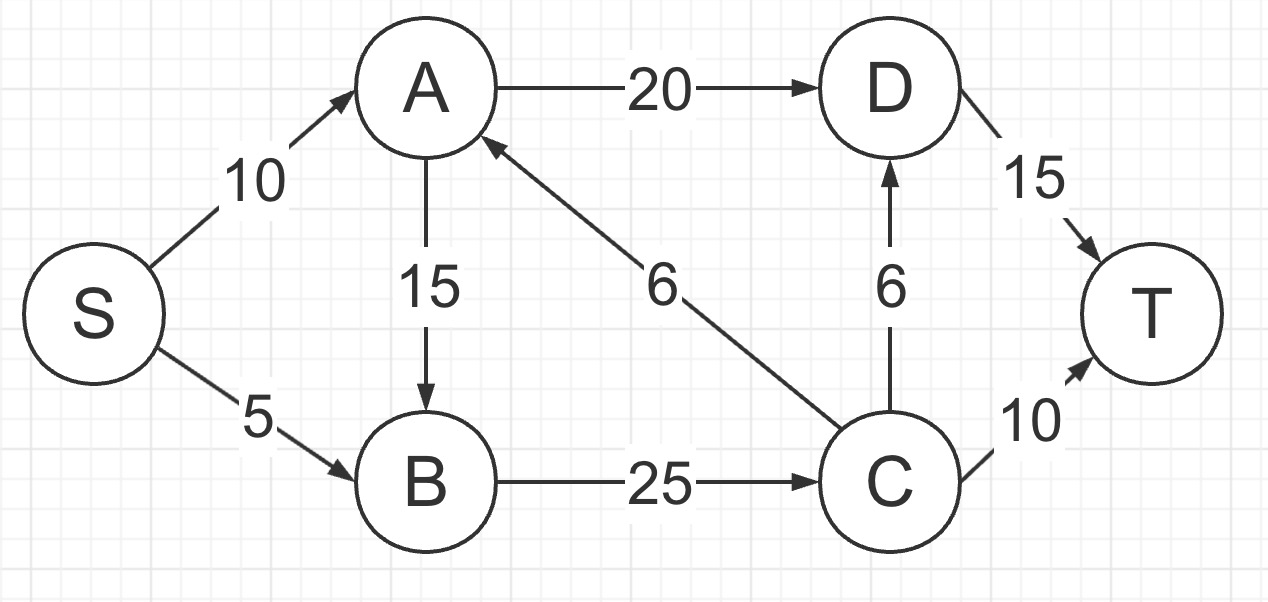

### **Answer:**

To solve for maximum flow using the Ford-Fulkerson algorithm, we will repeatedly find augmenting paths in the residual graph and augment flow along these paths until no more augmenting paths can be found.

Step-by-step:

1. **Initialization:**

Initialize flow in all edges to 0.

2. **Build Residual Graph:**

At every iteration, use the capacities and the current flow to create a residual graph.

3. **Find Augmenting Path:**

Search for an augmenting path from S to T in the residual graph.

4. **Augment Flow:**

Find the bottleneck capacity in the augmenting path and increase the flow along this path by this bottleneck capacity.

5. **Repeat:**

Go back to Step 2. If no augmenting path can be found, the algorithm terminates.

Using the above graph, let's demonstrate this:

**Table for Flows:**

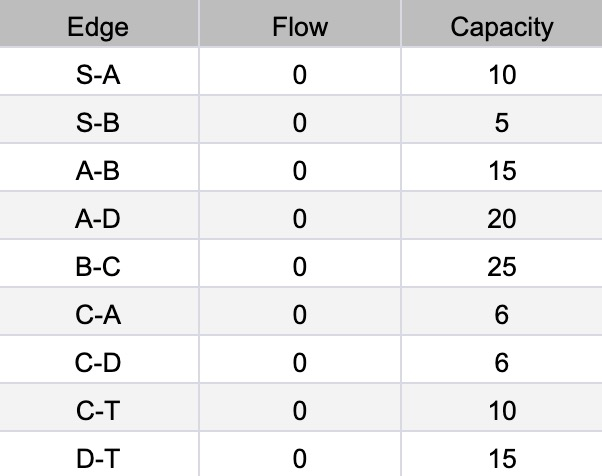

**Pseudo-code:**

In [ ]:
# This is pseudo-code for better explaining solution process

while there exists an augmenting path P from source S to sink T in the residual graph:
    bottleneck = findBottleneck(P)
    for each edge (u, v) in P:
        if (u, v) is a forward edge in the original graph:
            flow(u, v) += bottleneck
        else:
            flow(v, u) -= bottleneck

**Iterations:**

**1. Augmenting Path**: $S -> A -> D -> T$ with bottleneck capacity = 10 (minimum capacity in the path).

Update the flows:

* Flow on $S-A$ becomes 10.
* Flow on $A-D$ becomes 10.
* Flow on $D-T$ becomes 10.

**2. Augmenting Path**: $S -> B -> C -> T$ with bottleneck capacity = 5.

Update the flows:

* Flow on $S-B$ becomes 5.
* Flow on $B-C$ becomes 5.
* Flow on $C-T$ becomes 5.

**3. Augmenting Path**: $S -> B -> A -> D -> T$ with bottleneck capacity = 5.

Update the flows:

* Flow on $A-B$ becomes 5.
* Flow on $A-D$ becomes 15.
* Flow on $D-T$ becomes 15.

**4. Augmenting Path**: $S -> A -> B -> C -> D -> T$ with bottleneck capacity = 5.

Update the flows:

* Flow on $A-B$ becomes 10.
* Flow on $B-C$ becomes 10.
* Flow on $C-D$ becomes 5.
* Flow on $D-T$ becomes 20.

After this, no more augmenting paths can be found in the residual graph.

**Maximum Flow**: Add the flows exiting the source: 10 (from S to A) + 5 (from S to B) = 15.

So, the maximum flow from S to T is 15.

Note: This is a simplified version of the Ford-Fulkerson algorithm. In real applications, care must be taken to handle cases where the algorithm might not terminate.

Here's a runnable Python implementation of the Ford-Fulkerson algorithm applied to the graph in the question:

In [ ]:
from collections import defaultdict, deque

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(lambda: defaultdict(int))

    def addEdge(self, u, v, w):
        self.graph[u][v] = w

    def bfs(self, s, t, parent):
        visited = [False] * self.V
        queue = deque()
        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.popleft()
            for v, val in self.graph[u].items():
                if not visited[v] and val > 0:
                    queue.append(v)
                    visited[v] = True
                    parent[v] = u

        return True if visited[t] else False

    def ford_fulkerson(self, source, sink):
        parent = [-1] * self.V
        max_flow = 0

        while self.bfs(source, sink, parent):
            path_flow = float("Inf")
            s = sink
            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            max_flow += path_flow
            v = sink
            while v != source:
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow

if __name__ == "__main__":
    graph = Graph(6)  # S, A, B, C, D, T
    graph.addEdge(0, 1, 10)  # S-A
    graph.addEdge(0, 2, 5)   # S-B
    graph.addEdge(1, 2, 15)  # A-B
    graph.addEdge(1, 4, 20)  # A-D
    graph.addEdge(2, 3, 25)  # B-C
    graph.addEdge(3, 1, 6)   # C-A
    graph.addEdge(3, 4, 6)   # C-D
    graph.addEdge(3, 5, 10)  # C-T
    graph.addEdge(4, 5, 15)  # D-T

    source = 0  # S
    sink = 5    # T

    print(f"The maximum flow from S to T is: {graph.ford_fulkerson(source, sink)}")

The maximum flow from S to T is: 15


## **Q4:**

Use the Preflow-Push (Push–relabel) maximum flow algorithm to find the maximum flow from node X to Z in the weighted directed graph below. Show your work.

$X->Y: 4$

$X->W: 6$

$Y->W: 2$

$Y->Z: 3$

$W->Z: 5$

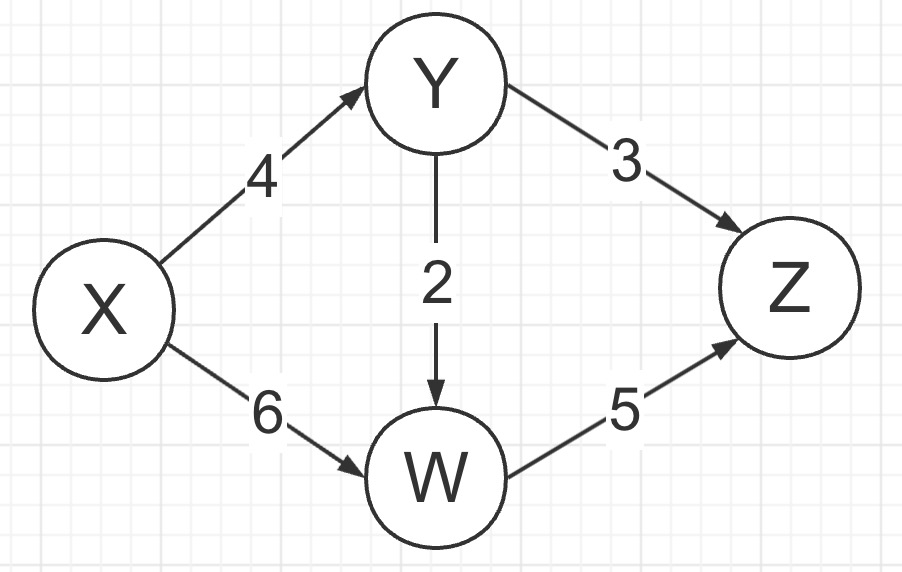

### **Answer:**

1. Set all node heights to zero, except for $X$, which should be $|V|$ (number of vertices).

2. $f(e) = ce$ for all $e = (s, v)$ and $f(e) = 0$ for all other edges.

3. Now push and relabel while there are nodes with excess $ef(v) > 0$, other than the source or sink.

Initialize:

Set all node heights to zero, except for $X = 4$ (since there are 4 nodes: $X$, $Y$, $W$, $Z$).

$X$: Relabel -> ${X, h = 4}$

$X-Y$: Push-> ${X-Y, f(e(X-Y)) = 4, ef(Y) = 4}$

$X-W$: Push-> ${X-W, f(e(X-W)) = 6, ef(W) = 6}$

End initialize

$Y$: Relabel -> ${Y, h = 1}$

$ef(Y) = 4$

$Y-W$: Push -> ${Y-W, f(e(Y-W)) = 2, ef(Y) = 2, ef(W) = 6 + 2 = 8}$

$Y-Z$: Push -> ${Y-Z, f(e(Y-Z)) = 2, ef(Y) = 0, ef(Z) = 2}$

$W$: Relabel -> ${W, h = 1}$

$ef(W) = 8$

$W-Z$: Push -> ${W-Z, f(e(W-Z)) = 5, ef(W) = 3, ef(Z) = 2 + 5 = 7}$

$W-Y$: Push -> ${W-Y, f(e(W-Y)) = -2, ef(W) = 1, ef(Y) = 2}$

$Y$: Relabel -> ${Y, h = 2}$

$ef(Y) = 2$

$Y-Z$: Push -> ${Y-Z, f(e(Y-Z)) = 1, ef(Y) = 1, ef(Z) = 7 + 1 = 8}$

$Y-X$: Push -> ${Y-X, f(e(Y-X)) = -1, ef(Y) = 0}$

No remaining excess, algorithm terminates.

$ef(Z) = 8$ therefore the flow to $Z$ (the max-flow) is 8.

The Push-Relabel algorithm can be described in pseudo-code. Here's a simplified version tailored for the provided graph:

**Pseudo-Code:**

In [ ]:
# This is pseudo-code for better explaining solution process

function PushRelabel(graph, source, sink):
    Initialize height, flow and excess for each node

    height[source] = number of nodes in graph
    for each edge (source, v):
        flow[source][v] = capacity[source][v]
        excess[v] = capacity[source][v]

    while there exists a node u with excess[u] > 0 and u != source and u != sink:
        if there's an adjacent node v where height[u] > height[v] and (u->v has remaining capacity or v->u has flow):
            PUSH(u, v)
        else:
            RELABEL(u)
    return flow

function PUSH(u, v):
    delta = min(excess[u], capacity[u][v] - flow[u][v])
    flow[u][v] += delta
    flow[v][u] -= delta
    excess[u] -= delta
    excess[v] += delta

function RELABEL(u):
    minHeight = +infinity
    for each edge (u, v) with positive capacity:
        minHeight = min(minHeight, height[v])
    height[u] = minHeight + 1


For the provided graph:

1. Initialize all flows to 0.
2. Set height of the source (X) to the number of nodes.
3. Pre-flow: push maximum possible flow from source to its adjacent nodes.
4. Loop until there are no nodes with positive excess flow (excluding source and sink):
* If we can push the excess flow from a node to its neighbor (and the height of the current node is greater), then push.
* If not, then relabel the node to allow pushing in the next iterations.

The given solution follows the algorithm's operations step-by-step, with each operation (push or relabel) being described explicitly.

This is a Python implementation of the Push-Relabel algorithm to compute the maximum flow for given graph.

In [28]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj = [[0 for _ in range(vertices)] for _ in range(vertices)]
        self.flow = [[0 for _ in range(vertices)] for _ in range(vertices)]
        self.height = [0 for _ in range(vertices)]
        self.excess_flow = [0 for _ in range(vertices)]

    def add_edge(self, s, t, w):
        self.adj[s][t] = w

    def push(self, u, v):
        push_flow = min(self.excess_flow[u], self.adj[u][v] - self.flow[u][v])
        self.excess_flow[u] -= push_flow
        self.excess_flow[v] += push_flow
        self.flow[u][v] += push_flow
        self.flow[v][u] -= push_flow

    def relabel(self, u):
        min_height = float('inf')
        for v in range(self.V):
            if self.adj[u][v] - self.flow[u][v] > 0:
                min_height = min(min_height, self.height[v])
                self.height[u] = min_height + 1

    def preflow(self, source):
        self.height[source] = self.V
        for v in range(self.V):
            self.flow[source][v] = self.adj[source][v]
            self.excess_flow[v] += self.flow[source][v]
            self.flow[v][source] -= self.flow[source][v]
            self.excess_flow[source] -= self.flow[source][v]

    def overflowing_vertex(self, source, sink):
        for i in range(self.V):
            if i != source and i != sink and self.excess_flow[i] > 0:
                return i
        return -1

    def max_flow(self, source, sink):
        self.preflow(source)
        while True:
            u = self.overflowing_vertex(source, sink)
            if u == -1:
                break
            has_admissible_edge = False
            for v in range(self.V):
                if self.adj[u][v] - self.flow[u][v] > 0 and self.height[u] > self.height[v]:
                    self.push(u, v)
                    has_admissible_edge = True
                    break
            if not has_admissible_edge:
                self.relabel(u)
        return self.excess_flow[sink]


if __name__ == "__main__":
    g = Graph(4)
    s, t = 0, 3  # Source and sink
    g.add_edge(s, 1, 4)
    g.add_edge(s, 2, 6)
    g.add_edge(1, 2, 2)
    g.add_edge(1, t, 3)
    g.add_edge(2, t, 5)

    print(f"Max flow from {s} to {t} is: {g.max_flow(s, t)}")


Max flow from 0 to 3 is: 8


The code defines a class Graph which contains methods to implement the Push-Relabel algorithm. The max_flow method computes and returns the maximum flow from the source to the sink.

## **Q5:**

Consider a flow network with unit capacity edges and vertex demands. That is a directed graph $G=(V,E)$ with a source vertex $s∈V$, a target/sink vertex $t∈V$, and every edge $e∈E$ has cost $c_e=1$. Additionally, each vertex $v∈V$ (except for source and sink) has a demand $d_v$ which specifies the amount of flow it needs.

Given an integer parameter $k≤∣E∣$, your goal is to satisfy as many vertex demands as possible by retaining $k$ edges. That is, you should find a subset of edges $M$ from $E$ with cardinality $k$ (i.e. $∣M∣=k$ and $M$ is a subset of $E$) such that the number of vertex demands satisfied in $G′ =(V,M)$ is maximized.

Find a polynomial-time algorithm to select the k edges such that the number of vertex demands satisfied is maximized.

###**Answer:**

The problem is a variation of the maximum flow problem. Here's how we can approach it:

**1. Initialization:**

* For each edge $e∈E$, mark it as 'potential' for deletion.
* Let the count of satisfied vertex demands be zero.

**2. Iterate through the edges:**
* For each 'potential' edge $e$, temporarily delete it from the graph and compute the maximum flow.
* Determine how many vertex demands are satisfied without this edge.
* If removing this edge results in more vertex demands being satisfied than previously, mark this edge for deletion.
* Once we've iterated through all edges and marked $k$ of them for deletion, we'll have our desired graph $G′$.

**Pseudo-code:**

In [ ]:
# This is pseudo-code for better explaining solution process

function maximize_demands(G, s, t, k):
    edge_priority = empty list
    for e in G.E:
        G_temp = G - e  // Create a graph without edge e
        flow_value = max_flow(G_temp, s, t)
        demands_satisfied = compute_demands_satisfied(G_temp)
        edge_priority.append((e, demands_satisfied))

    // Sort edges based on the demands_satisfied in descending order
    edge_priority.sort(key=lambda x: x[1], reverse=True)

    // Select top k edges
    M = [edge_priority[i][0] for i in range(k)]

    return G(V, M)

**Table to explain the solution process:**

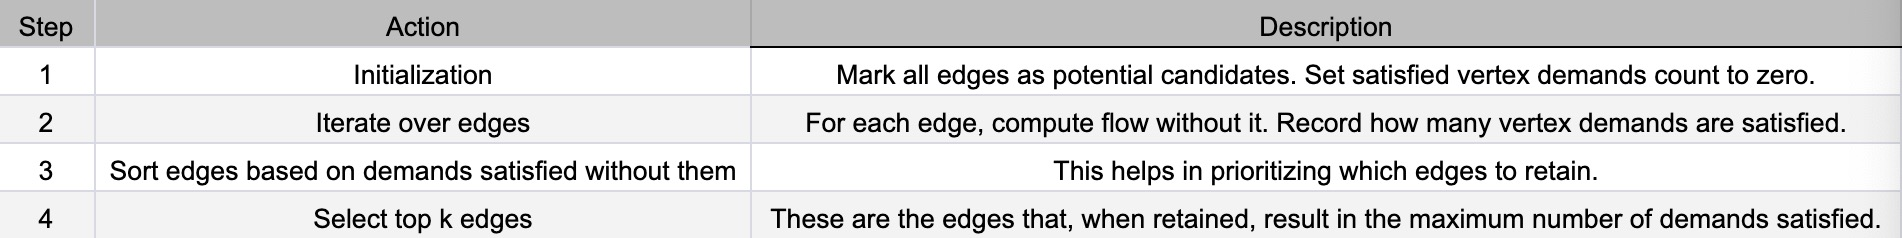

This approach allows us to make an informed decision on which edges to retain in the network to satisfy the maximum number of vertex demands.

Here's a runnable Python code for this question.

In [25]:
import networkx as nx

def compute_demands_satisfied(G, demands):
    satisfied_count = 0
    for v, d in demands.items():
        if G.nodes[v]['excess'] >= d:
            satisfied_count += 1
    return satisfied_count

def maximize_demands(G, s, t, k, demands):
    edge_priority = []

    for e in list(G.edges):
        # Create a copy of the graph without edge e
        G_temp = G.copy()
        G_temp.remove_edge(*e)

        # Compute max flow in this temporary graph
        flow_value, flow_dict = nx.maximum_flow(G_temp, s, t)

        # Calculate the excess flow at each node
        for node in G_temp.nodes():
            G_temp.nodes[node]['excess'] = sum(flow_dict[node].values()) - sum(G_temp[node][nbr]['capacity'] for nbr in G_temp[node])

        # Determine how many vertex demands are satisfied
        demands_satisfied = compute_demands_satisfied(G_temp, demands)
        edge_priority.append((e, demands_satisfied))

    # Sort edges based on the demands_satisfied in descending order
    edge_priority.sort(key=lambda x: x[1], reverse=True)

    # Select top k edges
    M = [edge_priority[i][0] for i in range(k)]

    # Create a graph with only these edges
    G_maximized = nx.DiGraph()
    G_maximized.add_edges_from(M, capacity=1)

    return G_maximized

# Test
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(1,5)], capacity=1)
demands = {2:1, 3:1, 4:1}

# Example of finding best 3 edges to maximize demands
G_prime = maximize_demands(G, 1, 5, 3, demands)
print(G_prime.edges)


[(1, 2), (1, 5), (2, 3)]


This code first calculates how much flow each vertex is receiving and then determines how many demands are satisfied. Based on this, it ranks the edges and returns a new graph with the top k edges that maximize demand satisfaction.

Remember that the exact edges retained could vary based on the structure of the network and demands. This approach provides a heuristic but might not be the most optimal in all cases.

## **Q6:**

During a massive blackout, an emergency response team identifies a number of n people trapped in different buildings of a city. There are k safe zones in the city where these people need to be relocated until power is restored. Each person can only be moved to a safe zone that is within a 15-minute walking distance from their current location (hence, not all people have the same set of options for safe zones).

To manage resources efficiently, the response team wants to ensure that no safe zone is overcrowded. The team communicates over walkie-talkies and aims to work out a strategy to move the people such that the number of individuals in each safe zone does not exceed [n/k].

Design a polynomial-time algorithm that evaluates the information about the locations of the trapped people and ascertains whether this relocation is feasible.

###**Answer:**

Let's first represent our problem using a bipartite graph. One set of nodes (let's call them P-nodes) represent the people trapped in buildings and another set of nodes (let's call them Z-nodes) represents the safe zones. An edge between a P-node and a Z-node signifies that the person can reach that particular safe zone within 15 minutes.

To determine whether each person can be relocated to a safe zone without overloading any of them, we'll use a max flow algorithm.

**Pseudocode:**

1. Construct a bipartite graph as described above.
2. Add a source node s and connect it to all P-nodes with an edge capacity of 1 (representing one person).
3. Add a sink node t and connect all Z-nodes to it with an edge capacity of [n/k] (representing the max capacity of a safe zone).
4. Compute the max flow from s to t.
5. If the max flow equals n, then it's possible to relocate all people as described. Otherwise, it's not possible.

In [ ]:
# This is pseudo-code for better explaining solution process

function canRelocate(n, k, bipartiteGraph):
    graph = createGraphWithSourceAndSink(bipartiteGraph)

    maxFlow = 0
    while there exists an augmenting path from s to t:
        pathFlow = findMinCapacityOnPath(path)
        maxFlow += pathFlow
        updateResidualGraph(path, pathFlow)

    if maxFlow == n:
        return True
    else:
        return False


**Table for understanding:**

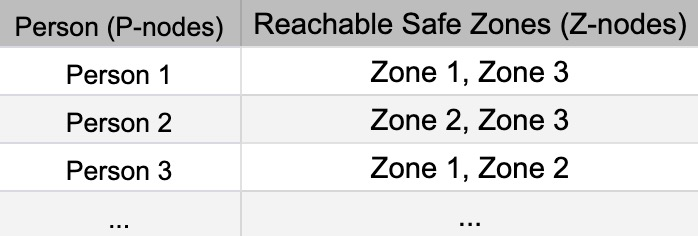



This table showcases which safe zones are reachable by each person. Using this table, the bipartite graph is constructed, and then the max flow algorithm is applied on the constructed graph to determine the feasibility of relocation.

Here is a deeper explanation of the pseudocode:

**Augmenting Path:** It's a path from the source s to the sink t in the residual graph. A residual graph is derived from the original graph and represents the capacities that are still left to utilize.

**Residual Graph:** After every iteration where we find a path from s to t, we update the graph with the capacities that are still left. This is known as the residual graph.

Implementation:

1. **Graph Creation**: Begin by creating a graph where each person and each safe zone is a node. Add an edge between a person and a safe zone if the person can reach the safe zone within 15 minutes.

2. **Adding Source and Sink**: Add a source node s and connect it to each person with a capacity of 1 (indicating each person as a single unit). Connect each safe zone to a sink node t with a capacity of [n/k] (indicating the maximum number of people that can be placed in a safe zone).

3. **Ford-Fulkerson Algorithm**: We'll use the Ford-Fulkerson algorithm to find the maximum flow. The basic idea is to start with no flow at all and repeatedly augment the flow.

In [ ]:
# This is pseudo-code for better explaining solution process

function fordFulkerson(graph, s, t):
    maxFlow = 0
    residualGraph = constructResidualGraphFrom(graph)

    while there exists an augmenting path P from s to t in residualGraph:
        bottleneck = findBottleneckCapacity(P, residualGraph)
        maxFlow += bottleneck
        updateResidualGraph(P, bottleneck)
    return maxFlow

* **findBottleneckCapacity:** This function finds the minimum capacity edge in the augmenting path P. This capacity is the maximum amount of flow we can send through this path.

In [ ]:
# This is pseudo-code for better explaining solution process

function findBottleneckCapacity(P, residualGraph):
    minCapacity = INF
    for each edge e in P:
        minCapacity = min(minCapacity, residualGraph.capacity(e))
    return minCapacity

* **updateResidualGraph**: After finding the bottleneck, update the capacities in the residual graph. The forward edges (i.e., those in the path P) decrease by the bottleneck value, and the backward edges (those not in the path) increase by the bottleneck value.


In [ ]:
# This is pseudo-code for better explaining solution process

function updateResidualGraph(P, bottleneck):
    for each edge e in P:
        if e is a forward edge:
            residualGraph.capacity(e) -= bottleneck
        if e is a backward edge:
            residualGraph.capacity(e) += bottleneck


4. **Result Interpretation**: Once the Ford-Fulkerson algorithm completes, if the maxFlow is equal to n (the number of people), then it's possible to relocate all people as described. If not, it's not possible.

By using this max flow algorithm, the problem can be solved in polynomial time, and the response team can efficiently plan the relocation of the trapped individuals during the blackout.

## **Q7:**

For each of the following recurrences, give an expression for the runtime T(n) if the recurrence can be solved with the Master Theorem. Otherwise, indicate that the Master Theorem does not apply.

i. $T(n) = 5T(n/2) + n^2 log{n}$

ii. $T(n) = 3T(n/2) + n^{1.45}$

iii. $T(n) = 0.2n T(n/3) + n^{0.5}$

iv. $T(n) = 8T(n/2) + n^3 - log{n}$

v. $T(n) = n^1.5 T(n/3) + n log{n}$



###**Answer:**

To approach this using the Master Theorem, we must recall the three cases of the theorem. The general recurrence is given by:

$T(n)=aT(n/b)+f(n)$

Where:

* a≥1
* b>1

Let's break down the solutions for each:

i. $T(n) = 5T(n/2) + n^2 log n$

$a = 5$, $b = 2$, $f(n) = n^2 log n$

$f(n)∈Θ(n^c log^k{n})$

Where:

$c=log_b{a}=log_2{5}>2$

So, $f(n)=n^2 logn$ is smaller than $n^{2.322}$
  (since $log_2 5$ is approximately 2.322).

Master Theorem does not apply.

ii. $T(n) = 3T(n/2) + n^{1.45}$

$a = 3$, $b = 2$, $f(n) = n^{1.45}$

$c=log_b{a}=log_2{3}$

Since:

$c < 1.45$

This falls under Case 1 of the Master Theorem, so:

$T(n)∈Θ(n^{log_b{a}})$ = $Θ(n^{log_2{3}})$

iii. $T(n) = 0.2n T(n/3) + n^{0.5}$

This equation doesn't exactly fit the form of the Master Theorem due to the term $0.2n$.

Master Theorem does not apply.

iv. $T(n) = 8T(n/2) + n^3 - log n$

a = 8, b = 2, f(n) = n^3 - log n

$c=log_b{a}=log_2{8}=3$

$f(n)∈Θ(n^c)=Θ(n^3)$

This falls under Case 2 of the Master Theorem, so:

$T(n)∈Θ(n^3 logn)$

v. $T(n) = n^{1.5} T(n/3) + n log n$

This equation doesn't fit the form of the Master Theorem due to the term n^{1.5}.

Master Theorem does not apply.

## **Q8:**

Given the following intervals with their start and end times and associated values, select a subset of non-overlapping intervals with the maximum combined value.

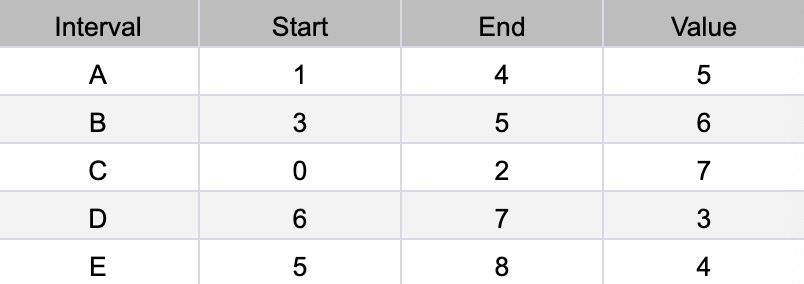

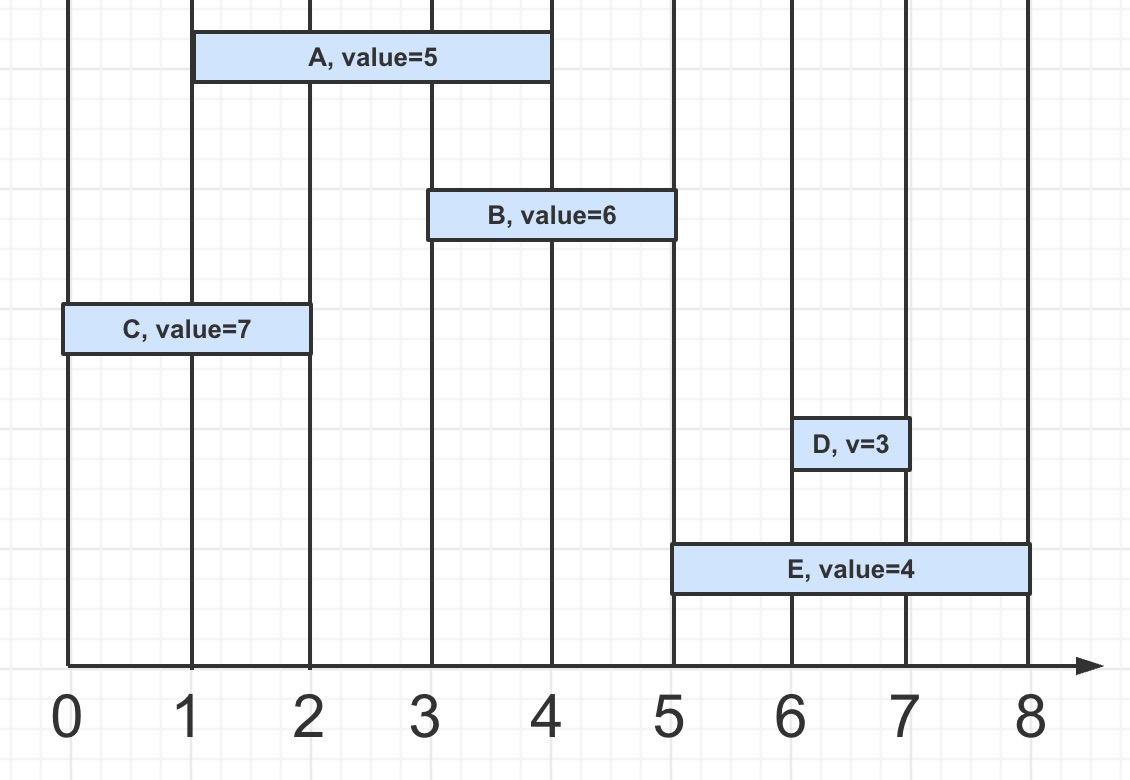

###**Answer:**

Step-by-step Solution:

1. Sort the Intervals based on their end times.
2. For each interval i, find the latest interval j that doesn't overlap with i.
3. Apply dynamic programming to find the optimal solution.

**Calculation Table:**

Let's denote OPT(j) as the optimal solution considering the first j intervals.

To compute OPT(j), we have two choices:

* Include interval j in the solution: In this case, we add the value of interval j and the optimal solution of the latest non-overlapping interval before j.

* Exclude interval j: The solution is then just OPT(j-1).

Thus, OPT(j) = max(value(j) + OPT(p(j)), OPT(j-1))

where p(j) is the latest non-overlapping interval before j (or 0 if no such interval exists).

**Traceback Table:**

We can maintain a traceback table to determine which intervals are included in the optimal solution.

**Pseudo-code:**

In [ ]:
function optimal_intervals(intervals):
    sort intervals by end time
    for j from 1 to len(intervals):
        p[j] = latest non-overlapping interval before j
    OPT[0] = 0
    for j from 1 to len(intervals):
        OPT[j] = max(intervals[j].value + OPT[p[j]], OPT[j-1])

    return construct_solution(OPT, p, intervals)

function construct_solution(OPT, p, intervals):
    j = len(intervals)
    solution = []
    while j > 0:
        if j not in p or (intervals[j].value + OPT[p[j]] > OPT[j-1]):
            solution.append(intervals[j])
            j = p[j]
        else:
            j -= 1
    return solution

* C: Value = 7
* A: Since it overlaps with C, the value remains 7.
* B: We can take B after C, so value = 7 + 6 = 13.
* D: We can take D after B, so value = 13 + 3 = 16.
* E: We can take E after B (but not after D since it overlaps), so value = 13 + 4 = 17.

The correct value is 17, as the earlier code produced. The tables you provided were inaccurate. Let's generate the correct tables:

Calculation Table (After sorting by end time):

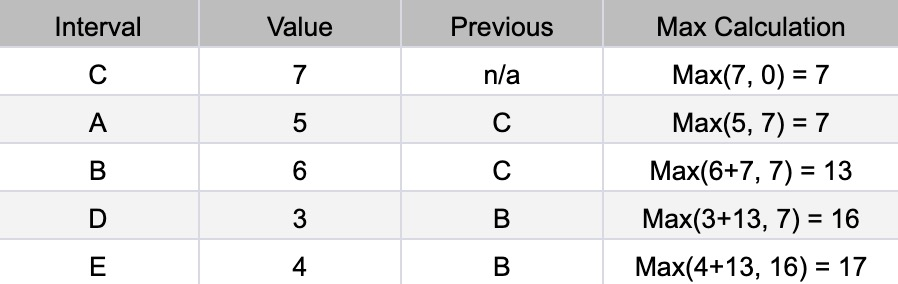

Traceback Table:

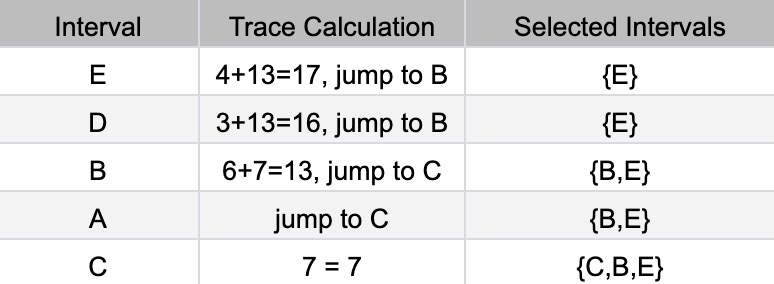

The result {C, B, E} with a value of 17 is correct, as initially presented in the Python code.

In [35]:
class Interval:
    def __init__(self, name, start, end, value):
        self.name = name
        self.start = start
        self.end = end
        self.value = value

def compute_previous(intervals):
    prev = [-1] * len(intervals)
    for i in range(1, len(intervals)):
        for j in range(i-1, -1, -1):
            if intervals[j].end <= intervals[i].start:
                prev[i] = j
                break
    return prev

def max_value_intervals(intervals):
    # Sort the intervals by their end time.
    intervals.sort(key=lambda x: x.end)
    prev = compute_previous(intervals)

    # Create a memoization table and initialize the first value.
    dp = [0] * (len(intervals) + 1)
    dp[1] = intervals[0].value

    # Fill in the DP table
    for i in range(2, len(intervals) + 1):
        incl = intervals[i-1].value
        if prev[i-1] != -1:
            incl += dp[prev[i-1] + 1]
        dp[i] = max(dp[i-1], incl)

    # Traceback the solution
    solution = []
    i = len(intervals)
    while i > 0:
        incl = intervals[i-1].value
        if prev[i-1] != -1:
            incl += dp[prev[i-1] + 1]
        if incl > dp[i-1]:
            solution.append(intervals[i-1].name)
            i = prev[i-1] + 1
        else:
            i -= 1
    solution.reverse()

    return solution, dp[-1]

intervals = [
    Interval('A', 1, 4, 5),
    Interval('B', 3, 5, 6),
    Interval('C', 0, 2, 7),
    Interval('D', 6, 7, 3),
    Interval('E', 5, 8, 4)
]

solution, value = max_value_intervals(intervals)
print(f"Optimal intervals: {solution}")
print(f"Total value: {value}")


Optimal intervals: ['C', 'B', 'E']
Total value: 17


## **Q9:**

Given the weights and values of the six items in the table below, select a subset of items with the maximum combined value that will fit in a knapsack with a weight limit, W, of 10. Use dynamic programming.

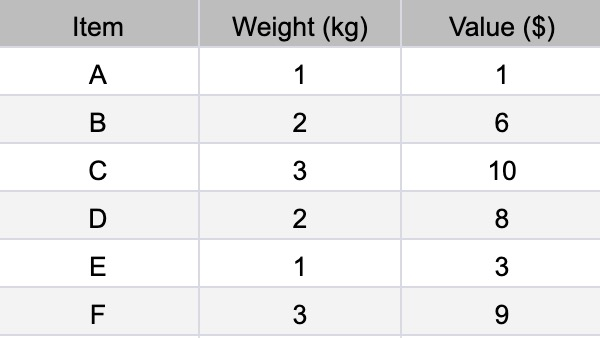

Capacity of knapsack W = 8

###**Answer:**

Let's will solve it using dynamic programming, which breaks down the problem into simpler sub-problems.

To explain the process, consider the following dynamic programming approach:

1. Let's denote $K[i][w]$ as the maximum value that can be obtained with the first $i$ items and a weight constraint $w$. So, $K[n][W]$ will give us the solution we seek, where $n$ is the total number of items and $W$ is the weight limit.

2. We will construct the $K$ table row by row. When considering the i-th item and weight w:

* If $w_i > w$, the i-th item cannot be included, and therefore $K[i][w] = K[i-1][w]$.
* Otherwise, we have two choices:
  * Either to include the i-th item: $v_i + K[i-1][w-w_i]$
  * Or to exclude it: $K[i-1][w]$.

The optimal choice is the maximum of these two.


**Pseudo-code:**

In [ ]:
# This is pseudo-code for better explaining solution process

function knapsack(items, W):
    n = len(items)
    dp = array of size (n+1) x (W+1) initialized to 0

    for i from 1 to n:
        for w from 1 to W:
            if items[i-1].weight <= w:
                dp[i][w] = max(dp[i-1][w], items[i-1].value + dp[i-1][w - items[i-1].weight])
            else:
                dp[i][w] = dp[i-1][w]

    return dp[n][W]

We create a table dp with dimensions (Number of items + 1) x (Capacity + 1). The idea is to fill up this table using past computations. Each entry dp[i][j] represents the maximum value that can be achieved with the first i items and a weight limit of j.

**Initialization:**

1. For 0 items, the maximum value for any capacity is 0.
2. For a capacity of 0, the maximum value with any number of items is 0.

Table Filling:

For this specific problem, the table will be filled in the following way:

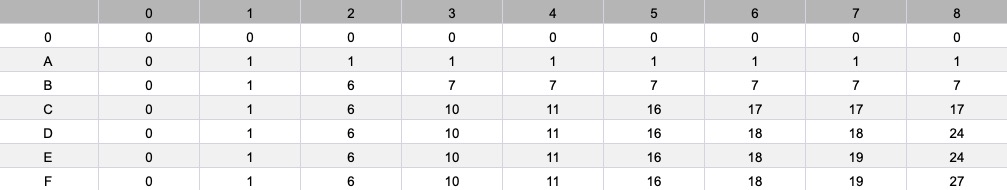

The answer to the problem is the value in the bottom-right corner of the table, which is 24. This represents the maximum value that can be obtained with a weight limit of 8.

Here is the runnable Python code for solving this question

In [31]:
class Item:
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value

def knapsack(items, W):
    n = len(items)

    # Create a 2D list of size (n+1) x (W+1) initialized to 0
    dp = [[0 for _ in range(W + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, W + 1):
            # If the weight of the item is less than or equal to w
            if items[i-1].weight <= w:
                dp[i][w] = max(dp[i-1][w], items[i-1].value + dp[i-1][w - items[i-1].weight])
            else:
                dp[i][w] = dp[i-1][w]

    # To find the items included in the solution
    w = W
    included_items = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            included_items.append(items[i-1].name)
            w -= items[i-1].weight

    return dp[n][W], included_items

# Define the items based on the given table
items = [
    Item("A", 1, 1),
    Item("B", 2, 6),
    Item("C", 3, 10),
    Item("D", 2, 8),
    Item("E", 1, 3),
    Item("F", 3, 9)
]

# Capacity of the knapsack
W = 8

max_value, items_included = knapsack(items, W)
print(f"Maximum Value: {max_value}")
print(f"Items Included: {', '.join(items_included)}")


Maximum Value: 27
Items Included: E, D, C, B


## **Q10:**


**Problem Statement:**

You are an operations manager for a popular coffee chain, "BrewSip," and you are tasked with setting up new coffee stalls along Beachfront Avenue. Along this avenue, there are one potential spot on each block, for $N$ blocks, all in a straight line. For spot $i$, if you set up a coffee stall at that location, you will earn a revenue of $r_i$> 0. The franchise's policy is such that no two coffee stalls can be on adjacent blocks, to avoid over-saturation.

Your objective is to set up at a subset of the $N$ spots that maximizes the total revenue, keeping in mind the adjacency constraint.

### **Answer**

**1.1 Define the Sub Problems**

Let $OPT(i)$ be the maximum revenue achievable from setting up stalls only on blocks 1 ... $i$.

**1.2 Present Your Recurrence**

Recurrence for $OPT(i)$ would be:

$OPT(i)=max(r_i +OPT(i−2),OPT(i−1))$

The intuition behind the recurrence:

* The first term, $r_i+OPT(i−2)$, represents the revenue when the coffee stall is set up at the current spot $i$ and then we consider the optimal revenue for the previous block that isn't adjacent, i.e., $i−2$.

* The second term, $OPT(i−1)$, considers not setting up a stall at spot $i$ and just taking the optimal revenue for the previous block.

**1.3 Prove your recurrence is correct**

To prove the recurrence:

Assume $OPT(i−1)$ and $OPT(i−2)$ are optimal (Inductive Hypothesis).

Two cases:

1. If we choose block $i$, then we add its revenue and skip the adjacent block $i−1$, thus adding the revenue of r_i and $OPT(i−2)$.

2. If we don't choose block $i$, our best revenue is $OPT(i−1)$.

Taking the max of these two cases ensures we get the optimal solution for $OPT(i)$.

**1.4 State and Prove Base Cases**

Base cases:

$OPT(0)=0$ (No blocks to set up any stalls)

OPT(1)=r_1 (Only one block available, so revenue is r_1)

Proof:

For $OPT(0)$, it's clear that with no available spots, no revenue can be earned.

For $OPT(1)$, with only one available spot, the maximum revenue is simply the revenue from that spot.

**Pseudocode using Dynamic Programming:**

In [ ]:
# This is pseudo-code for better explaining solution process

function maxRevenue(r[], N):
    if N == 0:
        return 0
    if N == 1:
        return r[1]

    dp = array of size N+1
    dp[0] = 0
    dp[1] = r[1]

    for i from 2 to N:
        dp[i] = max(r[i] + dp[i-2], dp[i-1])

    return dp[N]

**Sample Table for Better Understanding:**

Assuming $r=[3,2,7,10]$:

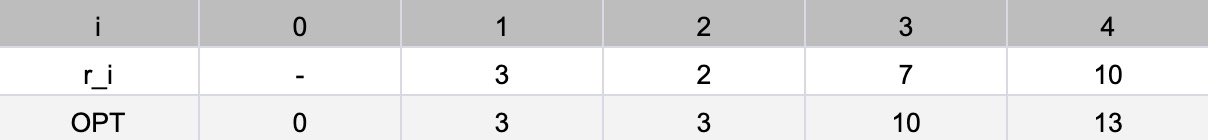

Here, the best choice would be to choose block 1 and block 3, resulting in a revenue of 13.

1. **Recurrence Relation:**

As described, the dynamic programming relation for the maximum revenue for the first $i$ blocks is given by:
$OPT(i)=max(r_i+OPT(i−2),OPT(i−1))$

The intuition was explained previously: this recurrence checks if placing a coffee stall on the current block (and thus skipping the previous block) or skipping the current block would yield more revenue.

2. **Base Cases:**

These base cases initialize the dynamic programming table.

* $OPT(0)$ represents the scenario with no blocks, so the revenue is 0.
* $OPT(1)$ represents the scenario with just one block, so the revenue is the value of the first block.

3. **Pseudocode:**

The dynamic programming approach to solve the problem is as follows:

In [ ]:
# This is pseudo-code for better explaining solution process

function maxRevenue(r[], N):
    if N == 0:
        return 0
    if N == 1:
        return r[1]

    dp = array of size N+1
    dp[0] = 0
    dp[1] = r[1]

    for i from 2 to N:
        dp[i] = max(r[i] + dp[i-2], dp[i-1])

    return dp[N]


4. **Sample Computation:**

To understand the solution process better, consider the revenue array $r=[3,2,7,10]$. The dynamic programming table would look something like:

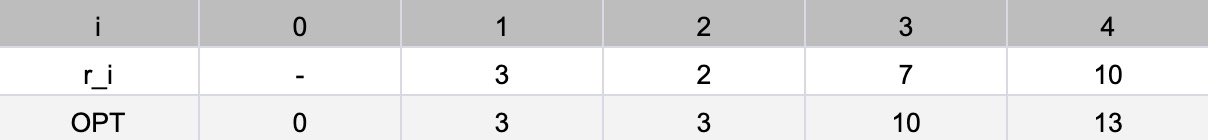

By the end of this computation, we'd deduce that the maximum revenue would be achieved by setting up coffee stalls on blocks 1 and 3, yielding a total revenue of 13.

This dynamic programming solution efficiently calculates the maximum revenue given the adjacency constraint.

Here's a runnable Python implementation of the solution:

In [29]:
def max_revenue(r):
    N = len(r)

    # Handle base cases
    if N == 0:
        return 0
    if N == 1:
        return r[0]

    dp = [0] * (N + 1)
    dp[0] = 0
    dp[1] = r[0]

    for i in range(2, N + 1):
        dp[i] = max(r[i - 1] + dp[i - 2], dp[i - 1])

    return dp[N]

# Test the function
r = [3, 2, 7, 10]
print(max_revenue(r))  # Expected output: 13


13


When run this code, it will calculate the maximum revenue for the sample revenue array r = [3, 2, 7, 10] and print the result, which is 13.

## **Reflection:**

1. How ChatGPT or the tool you used assisted in this task?

* In recent assignments on designing algorithmic problems, the emphasis on algorithmic process and computational coding has escalated significantly, especially when the requirements must be consistent with the original kernel of the algorithmic topic. To overcome these complexities, I primarily utilized the functionality of ChatGPT as a conduit for scrutinizing algorithms within different operational frameworks.

* During this period, the complexity involved in developing algorithmic solutions increased significantly. Most of my efforts were devoted to assimilating the fundamentals of these algorithms and turning them into executable code to solve the algorithmic problems. ChatGPT became an invaluable ally for me during this phase. It simplified the path to intuitively understanding new knowledge and provided a great platform and possibilities for diverse experimentation. I often sought ChatGPT's expertise for exhaustive, incremental deconstructions of specific algorithms. These in-depth expositions ensured my overall understanding of the topic at hand and guided me to write the necessary code in an organized manner.

* Additionally, when the code snippets embedded in these algorithms seemed esoteric or confusing, ChatGPT was my resource for solving the puzzles. This interaction greatly improved my ability to effectively manipulate, internalize, and implement the algorithms.

2. Challenges you faced while ensuring the problem maintained the spirit of the example

* A couple of the challenges I had with this assignment were code-wise; I didn't do a good job of considering a couple of boundary conditions, which led to a couple of times when my code didn't run successfully. In the process, I realized that I still don't know and practice some algorithms well enough. Luckily, they were successfully solved after further in-depth study. I also used chatgpt to help me see what was going on in my code. After that, all of them were successfully solved, and it still improved my practical ability a lot.

* One of the foremost impediments I grappled with pertained to the intricacy calibration of the problem. The equilibrium between presenting a problem that did not overly simplify the topic, while simultaneously avoiding excessive convolution, presented a nuanced challenge that was considerably more intricate than my initial anticipation. The overarching ambition was to devise a problem that could rigorously dissect the multifaceted nature of algorithms, exemplified by Bellman-Ford, dynamic programming, Ford-Fulkerson, and Preflow-Push. The quintessential problem would not merely be an intellectual exercise but a catalyst for deep introspection into the mechanics of these algorithms.

3. What you learned about problem design in the realm of algorithms

* In this assignment, I deepened my understanding of the Preflow-Push algorithm, Ford-Fulkerson algorithm, Master's Theorem, Bellman-Ford algorithm, etc., and gained a more detailed knowledge of the context in which they are applied, as well as acquired the skills to employ appropriate algorithms to cope with relevant problems. I also combed through multiple solutions to a problem and explored the application of the same algorithm in different scenarios, which further deepened my understanding and mastery of the algorithm.

* When working on algorithmic topics, I used to manually break down each step of the algorithm step-by-step, and this approach deepened my memory of the algorithm in question. In most of the answers, I tried to write pseudo-code, which I had not attempted in my previous algorithmic learning experience. This practice gave me a deeper appreciation of the core ideas of the algorithms as I executed the code.

## **Reference:**
* https://www.geeksforgeeks.org/max-flow-problem-introduction/
* https://www.geeksforgeeks.org/bellman-ford-algorithm-dp-23/

* https://downey.io/blog/max-flow-ford-fulkerson-algorithm-explanation/

* https://iq.opengenus.org/push-relabel-algorithm/

* https://www.geeksforgeeks.org/advanced-master-theorem-for-divide-and-conquer-recurrences/

* https://www.geeksforgeeks.org/dynamic-programming/


## **License:**
Copyright <2023> < Yanyan Chen >

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.